<a href="https://colab.research.google.com/github/Andicleomj/Machine-Learning/blob/main/Week6/Clustering%20Model/Online%20Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Andi Cleopatra Maryam Jamila (1103213071)**

**Langkah 1: Persiapan dan Pemahaman Data**

In [1]:
# 1. Import Library yang Diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

* pandas: Untuk membaca dan memanipulasi data.
* StandardScaler: Untuk menormalkan data.
* KMeans: Model clustering yang umum.
* silhouette_score: Metrik evaluasi yang mengukur konsistensi kelompok.
* KElbowVisualizer: Untuk visualisasi nilai knee point.

In [4]:
# 2. Membaca dan Mengeksplorasi Data
data = pd.read_excel('/content/sample_data/Online Retail.xlsx')
data.info()  # Informasi dasar tentang dataset
data.head()  # Melihat 5 baris pertama dari dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


* Untuk memahami struktur data, kolom-kolom penting, dan nilai missing (kosong).

In [5]:
# Membersihkan Data
data = data.dropna()  # Menghapus baris dengan nilai kosong
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]  # Menyaring data valid


* Membersihkan data membantu kita menghindari pengaruh negatif pada hasil clustering.

**Langkah 2: Menyiapkan Data untuk Clustering**

In [6]:
# Membuat Fitur Relevan
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']  # Total harga tiap transaksi
customer_data = data.groupby('CustomerID').agg({'TotalPrice': 'sum', 'InvoiceNo': 'count'}).rename(columns={'InvoiceNo': 'TotalTransactions'})


* Mengelompokkan data per pelanggan membantu dalam mengidentifikasi pola pembelian dan transaksi.

In [7]:
# Normalisasi Data
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data)


* Normalisasi mengurangi dampak fitur dengan rentang besar pada hasil clustering.

**Langkah 3: Membuat Model Clustering**

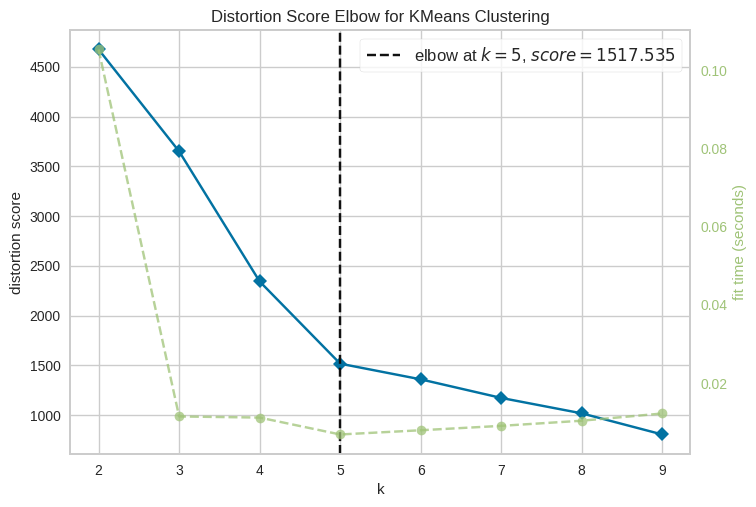

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
# Menentukan Jumlah Klaster dengan Metode Elbow: Untuk menentukan jumlah klaster optimal, kita bisa menggunakan metode elbow dengan KElbowVisualizer.
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(customer_data_scaled)
visualizer.show()


* Penjelasan: Metode elbow mencari titik di mana penurunan inertia (jumlah kuadrat jarak) melambat, yang menjadi titik ideal untuk jumlah klaster.
* Insight: Jumlah klaster optimal akan menjadi titik di mana grafik mengalami penurunan signifikan terakhir.

In [9]:
# Membuat Model K-Means dengan Jumlah Klaster Optimal
optimal_k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
labels = kmeans.fit_predict(customer_data_scaled)
customer_data['Cluster'] = labels


* Setiap pelanggan sekarang memiliki label klaster yang mengelompokkannya dengan pelanggan lain yang memiliki pola pembelian serupa.

**Langkah 4: Evaluasi Model Clustering**

In [10]:
# Silhouette Score: Metrik ini mengukur seberapa dekat titik dalam klaster satu sama lain dibandingkan klaster lainnya.
silhouette_avg = silhouette_score(customer_data_scaled, labels)
print("Silhouette Score untuk model K-Means:", silhouette_avg)


Silhouette Score untuk model K-Means: 0.7711310392271067


* Nilai mendekati 1 menunjukkan klaster yang baik, sedangkan nilai mendekati 0 berarti ada tumpang tindih antara klaster.

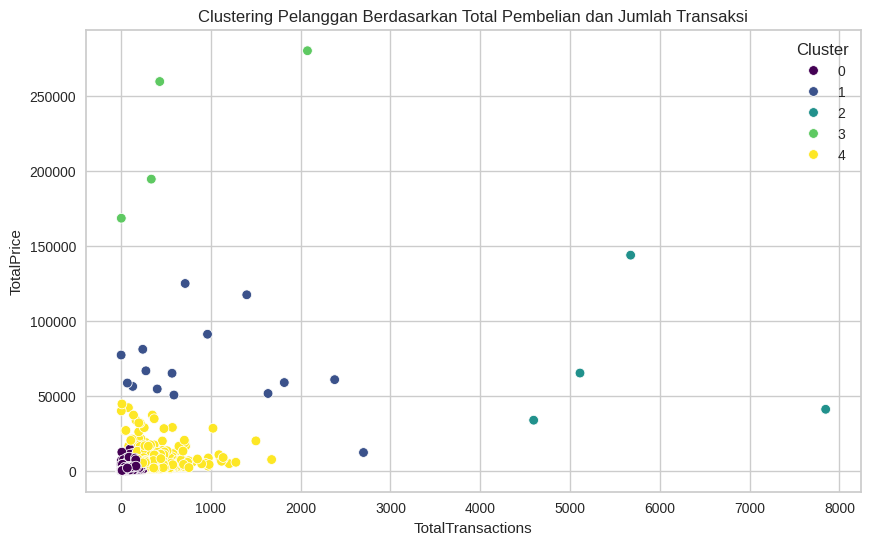

In [11]:
# Visualisasi Hasil Clustering
plt.figure(figsize=(10,6))
sns.scatterplot(x=customer_data['TotalTransactions'], y=customer_data['TotalPrice'], hue=customer_data['Cluster'], palette='viridis')
plt.title("Clustering Pelanggan Berdasarkan Total Pembelian dan Jumlah Transaksi")
plt.show()


* Visualisasi ini menunjukkan pola kelompok pelanggan berdasarkan kebiasaan pembelian. Kita dapat mengidentifikasi klaster mana yang memiliki jumlah transaksi tinggi atau total pembelian besar.